<a href="https://colab.research.google.com/github/kaviya206/Chatbot-using-LangGraph/blob/main/Chatbot_LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph langchain google-generativeai

In [ ]:
import google.generativeai as genai

genai.configure(api_key="YOUR_API_KEY")

model = genai.GenerativeModel("gemini-1.5-flash")


def ask_gemini(prompt: str) -> str:
    try:
        response = model.generate_content(prompt)
        return response.text
    except Exception as e:
        return "Sorry, something went wrong with the Gemini API."

In [ ]:
from typing import Optional
from typing_extensions import TypedDict


class GraphState(TypedDict):
    question: Optional[str]
    classification: Optional[str]
    response: Optional[str]

In [ ]:
def classify(state: GraphState) -> GraphState:
    question = state.get("question", "").lower()
    if any(word in question for word in ["hello", "hi", "hey", "good morning", "good evening"]):
        classification = "greeting"
    else:
        classification = "search"

    return {
        **state,
        "classification": classification
    }

In [ ]:
def respond(state: GraphState) -> GraphState:
    classification = state.get("classification")
    question = state.get("question")

    if classification == "greeting":
        response = "Hello! How can I help you today?"
    elif classification == "search":
        response = ask_gemini(question)
    else:
        response = "I'm not sure how to respond to that."

    return {
        **state,
        "response": response
    }

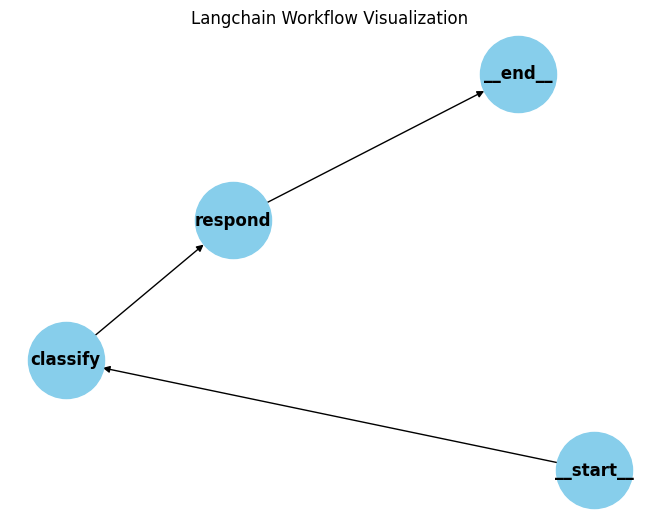

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from langgraph.graph import StateGraph

builder = StateGraph(GraphState)
builder.add_node("classify", classify)
builder.add_node("respond", respond)
builder.set_entry_point("classify")
builder.add_edge("classify", "respond")
builder.set_finish_point("respond")
app = builder.compile()


def visualize_workflow(builder):
    G = nx.DiGraph()

    for node in builder.nodes:
        G.add_node(node)
    for edge in builder.edges:
        G.add_edge(edge[0], edge[1])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000,
            node_color="skyblue", font_size=12, font_weight="bold", arrows=True)

    plt.title("Langchain Workflow Visualization")
    plt.show()


visualize_workflow(builder)

In [ ]:
print("=== Gemini-Powered Chatbot ===")
print("Type your question below. Type 'exit' to quit.\n")

while True:
    user_input = input("You: ")
    if user_input.strip().lower() in ['exit', 'quit']:
        print("Bot: Goodbye!")
        break

    state = {"question": user_input}
    result = app.invoke(state)
    print("Bot:", result["response"])

=== Gemini-Powered Chatbot ===
Type your question below. Type 'exit' to quit.

Bot: Hello! How can I help you today?


Bot: Sorry, something went wrong with the Gemini API.


Bot: Sorry, something went wrong with the Gemini API.


Bot: Sorry, something went wrong with the Gemini API.
Bot: Hello! How can I help you today?


Bot: Sorry, something went wrong with the Gemini API.
